## Load MNIST on Python 3.x

In [1]:
import pickle
import gzip
import numpy as np

In [27]:
filename = 'mnist.pkl.gz'
f = gzip.open(filename, 'rb')
training_data, validation_data, testing_data = pickle.load(f, encoding='latin1')

train_data=np.array(training_data[0])
train_target=np.array(training_data[1])
valid_data=np.array(validation_data[0])
valid_target=np.array(validation_data[1])
test_data=np.array(testing_data[0])
test_target=np.array(testing_data[1])

print(train_data.shape)
print(valid_data.shape)
print(test_data.shape)

print(train_target.shape)
print(valid_target.shape)
print(test_target.shape)
f.close()

(50000, 784)
(10000, 784)
(10000, 784)
(50000,)
(10000,)
(10000,)


## Load USPS on Python 3.x

In [28]:
from PIL import Image
import os


In [30]:
USPSMat  = []
USPSTar  = []
curPath  = 'USPSdata/Numerals'
savedImg = []

for j in range(0,10):
    curFolderPath = curPath + '/' + str(j)
    imgs =  os.listdir(curFolderPath)
    for img in imgs:
        curImg = curFolderPath + '/' + img
        if curImg[-3:] == 'png':
            img = Image.open(curImg,'r')
            img = img.resize((28, 28))
            savedImg = img
            imgdata = (255-np.array(img.getdata()))/255
            USPSMat.append(imgdata)
            USPSTar.append(j)
print(np.array(USPSMat).shape)
print(np.array(USPSTar).shape)            

(19999, 784)
(19999,)


In [80]:
#Softmax function

def softmax(x):
    x -= np.max(x)
    return np.exp(x) / np.sum(np.exp(x), axis=0)

In [31]:
#One Hot Encoding
import scipy.sparse
def oneHotIt(Y):
    m = Y.shape[0]
    #Y = Y[:,0]
    OHX = scipy.sparse.csr_matrix((np.ones(m), (Y, np.array(range(m)))))
    OHX = np.array(OHX.todense()).T
    return OHX

In [37]:
oneHotTestTarget=oneHotIt(test_target)
oneHotValidTarget=oneHotIt(valid_target)
oneHotTrainTarget=oneHotIt(train_target)
print(oneHotTrainTarget.shape)
print(oneHotValidTarget.shape)
print(oneHotTestTarget.shape)

(50000, 10)
(10000, 10)
(10000, 10)


In [42]:

def getLoss(w,x,y,lam):
    m = x.shape[0] #First we get the number of training examples
    y_mat = oneHotIt(y) #Next we convert the integer class coding into a one-hot representation
    scores = np.dot(x,w) #Then we compute raw class scores given our input and current weights
    prob = softmax(scores) #Next we perform a softmax on these scores to get their probabilities
    loss = (-1 / m) * np.sum(y_mat * np.log(prob)) + (lam/2)*np.sum(w*w) #We then find the loss of the probabilities
    grad = (-1 / m) * np.dot(x.T,(y_mat - prob)) + lam*w #And compute the gradient for that loss
    return loss,grad

In [81]:
def getProbsAndPreds(someX):
    probs = softmax(np.dot(someX,w))
    preds = np.argmax(probs,axis=1)
    return probs,preds

print(train_data.shape[1])
print(len(np.unique(train_target)))

784
10


In [82]:
w = np.zeros([train_data.shape[1],len(np.unique(train_target))])
lam = 1
iterations = 1000
learningRate = 1e-5
losses = []
for i in range(0,iterations):
    loss,grad = getLoss(w,train_data,train_target,lam)
    losses.append(loss)
    w = w - (learningRate * grad)
    
print(loss)

10.809408387272576


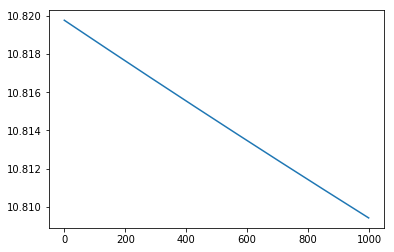

In [83]:
import matplotlib.pyplot as plt
plt.plot(losses)

In [78]:
def getAccuracy(someX,someY):
    prob,prede = getProbsAndPreds(someX)
    accuracy = sum(prede == someY)/(float(len(someY)))
    return accuracy

In [84]:
print(getAccuracy(train_data,train_target))
print(getAccuracy(test_data,test_target))

0.73108
0.7444
